In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Part B


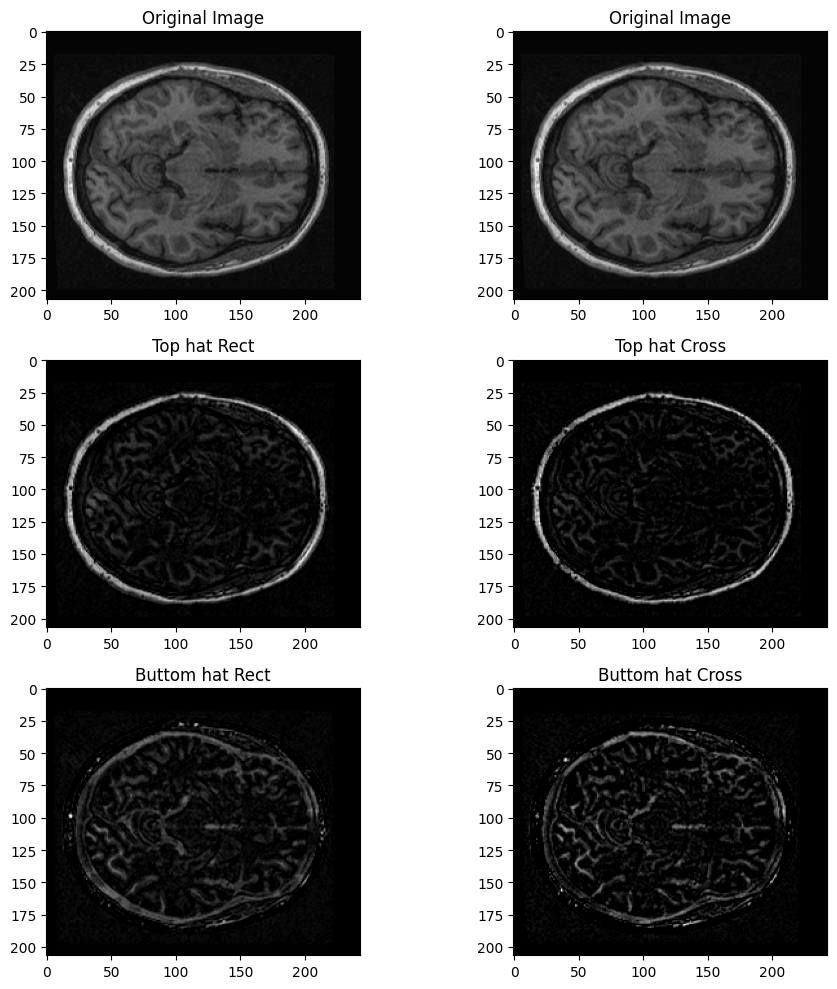

In [2]:
MRI_Img=cv.imread('mri_low_contrast.png',0)
Top_hat_Rect= MRI_Img -  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(7,7)))
Top_hat_Cross= MRI_Img -  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(7,7)))
ButtomTop_hat_Rect=  cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(7,7))) - MRI_Img
ButtomTop_hat_Cross=  cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(7,7))) - MRI_Img
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(MRI_Img,cmap='gray')
plt.title('Original Image')
plt.subplot(3,2,2)
plt.imshow(MRI_Img, cmap='gray')
plt.title('Original Image')
plt.subplot(3,2,3)
plt.imshow(Top_hat_Rect,cmap='gray')
plt.title('Top hat Rect')
plt.subplot(3,2,4)
plt.imshow(Top_hat_Cross,cmap='gray')
plt.title('Top hat Cross')
plt.subplot(3,2,5)
plt.imshow(ButtomTop_hat_Rect,cmap='gray')
plt.title('Buttom hat Rect')
plt.subplot(3,2,6)
plt.imshow(ButtomTop_hat_Cross,cmap='gray')
plt.title('Buttom hat Cross')
plt.tight_layout()
plt.show()

## Part C


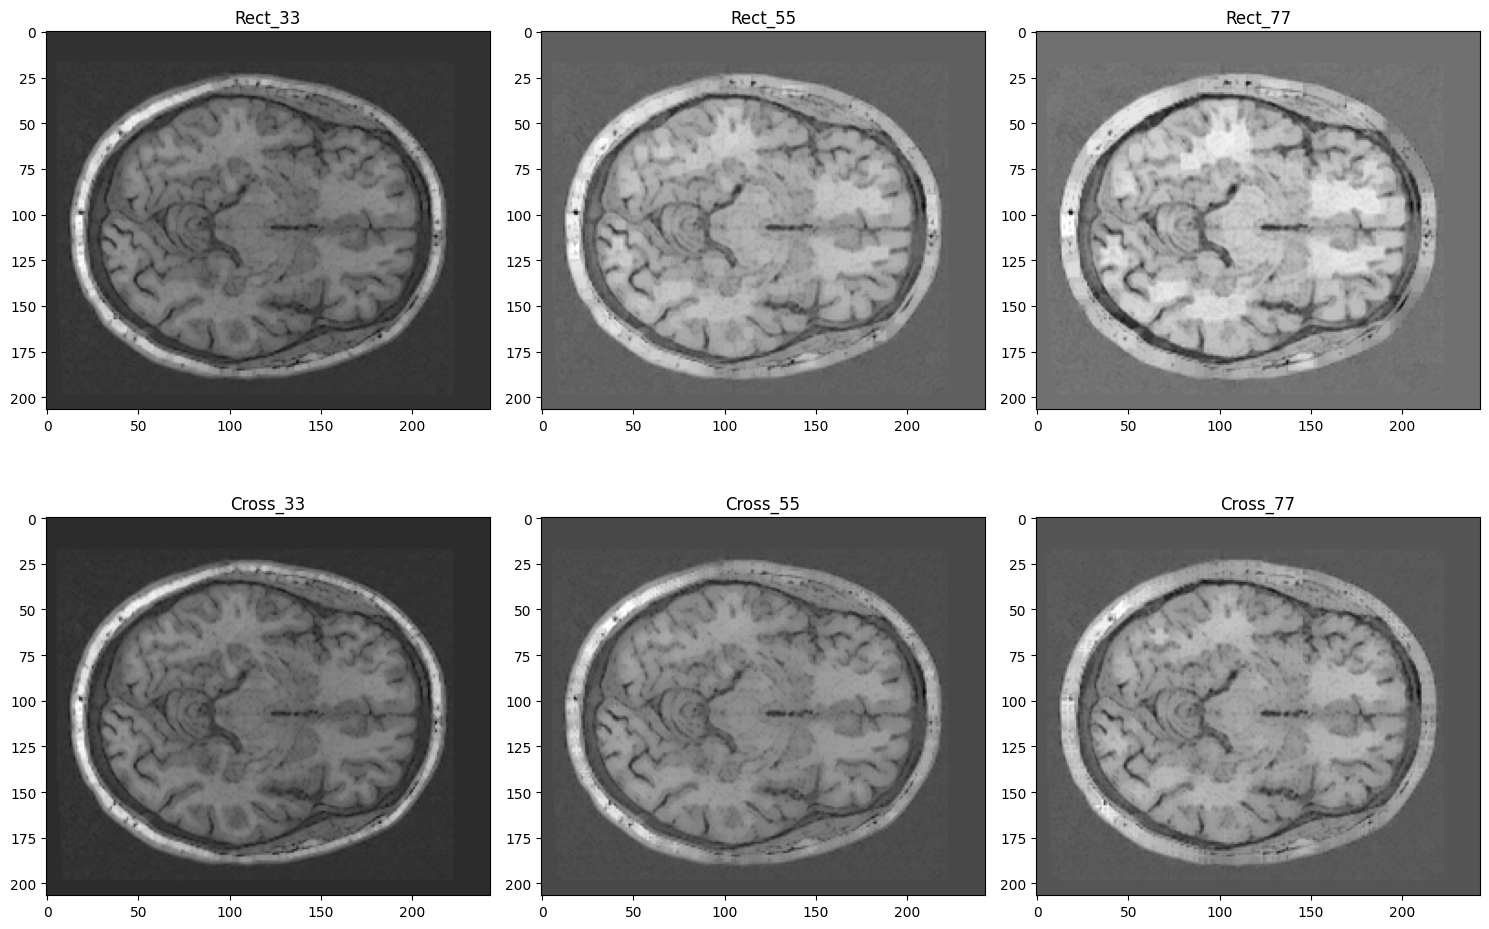

In [3]:
Rect_33 = (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(3,3))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(3,3)))    )
Rect_55= (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(5,5))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(5,5)))    )
Rect_77= (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(7,7))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(7,7)))    )


Cross_33 = (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(3,3))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(3,3)))    )
Cross_55= (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(5,5))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(5,5)))    )
Cross_77= (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(7,7))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(7,7)))    )


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(Rect_33, cmap='gray')
plt.title('Rect_33')


plt.subplot(2, 3, 2)
plt.imshow(Rect_55, cmap='gray')
plt.title('Rect_55')

plt.subplot(2, 3, 3)
plt.imshow(Rect_77, cmap='gray')
plt.title('Rect_77')

plt.subplot(2, 3, 4)
plt.imshow(Cross_33, cmap='gray')
plt.title('Cross_33')

plt.subplot(2, 3, 5)
plt.imshow(Cross_55, cmap='gray')
plt.title('Cross_55')

plt.subplot(2, 3, 6)
plt.imshow(Cross_77, cmap='gray')
plt.title('Cross_77')

plt.tight_layout()
plt.show()




In [4]:
def CIR(Original_img,Transformed_img,X,Y):
    X_start=X[0]
    X_end=X[1]
    Y_start=Y[0]
    Y_end=Y[1]
    CIR_Nom=0
    CIR_Den=0
    for i in range(X_start,X_end+1):
        for j in range(Y_start,Y_end+1):
                A_kernel_Org=Original_img[i-1:i+2,j-1:j+2]
                P_kernel_Org=Original_img[i-3:i+4,j-3:j+4]
                A_kernel_Tr=Transformed_img[i-1:i+2,j-1:j+2]
                P_kernel_Tr=Transformed_img[i-3:i+4,j-3:j+4]
                C_org = (np.abs(np.mean(P_kernel_Org)-np.mean(A_kernel_Org)))/np.abs(np.mean(P_kernel_Org)+np.mean(A_kernel_Org))
                C_Tr = (np.abs(np.mean(P_kernel_Tr)-np.mean(A_kernel_Tr)))/np.abs(np.mean(P_kernel_Tr)+np.mean(A_kernel_Tr))
                CIR_Nom+=(C_Tr - C_org)**2
                CIR_Den+=(C_org)**2

    return (CIR_Nom/CIR_Den)

In [5]:
X=[20,50]
Y=[50,100]
CIR_Rect33 = CIR(MRI_Img, Rect_33, X, Y)
CIR_Rect55 = CIR(MRI_Img, Rect_55, X, Y)
CIR_Rect77 = CIR(MRI_Img, Rect_77, X, Y)
CIR_Cross33 = CIR(MRI_Img, Cross_33, X, Y)
CIR_Cross55 = CIR(MRI_Img, Cross_55, X, Y)
CIR_Cross77 = CIR(MRI_Img, Cross_77, X, Y)
print("CIR_Rect33:", CIR_Rect33)
print("CIR_Rect55:", CIR_Rect55)
print("CIR_Rect77:", CIR_Rect77)
print("CIR_Cross33:", CIR_Cross33)
print("CIR_Cross55:", CIR_Cross55)
print("CIR_Cross77:", CIR_Cross77)

CIR_Rect33: 0.07641243520349972
CIR_Rect55: 0.5429832765532115
CIR_Rect77: 0.7585442997095022
CIR_Cross33: 0.03226553894816054
CIR_Cross55: 0.2795738098135311
CIR_Cross77: 0.5793351163226987


In [17]:
Rect_Structure_1=cv.getStructuringElement(cv.MORPH_RECT,ksize=(3,3))
structuring_element = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
flag=0
CIR_Rect_F = 0
i = 1
Rect_Structure=np.ones([3,3])

while True:

    Rect_Con = (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	Rect_Structure) -
                 cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	Rect_Structure) )
    CIR_Rect = CIR(MRI_Img , Rect_Con,X,Y)
    if CIR_Rect==CIR_Rect_F:
        break;
    
    CIR_Rect_F = CIR_Rect

    kernel_size= 3+2*i
    center = kernel_size // 2
    start_index = center - ((kernel_size-2) // 2 )
    end_index = center + ((kernel_size-2) // 2 + 1)

    Rect_Structure = np.zeros([kernel_size,kernel_size],dtype=np.uint8)

    Rect_Structure[start_index:end_index, start_index:end_index] = Rect_Structure_1
    Rect_Structure = cv.morphologyEx(Rect_Structure, cv.MORPH_DILATE, structuring_element)
    Rect_Structure_1 = Rect_Structure
    i+=1

print(CIR_Rect_F)
print(i)

93.68002634259882
77


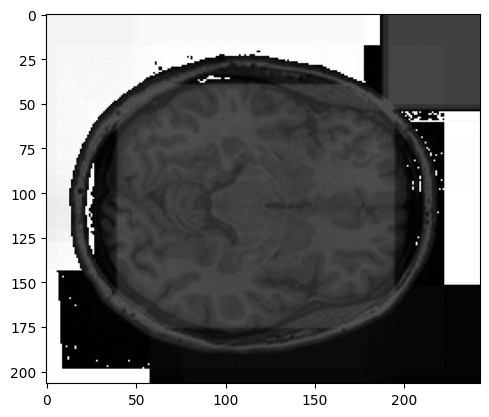

In [13]:
plt.imshow(Rect_Con,cmap='gray')
plt.show()

In [18]:
Rect_Structure_1=cv.getStructuringElement(cv.MORPH_RECT,ksize=(3,3))
structuring_element = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))
flag=0
CIR_Rect_F = 0
i = 1
Rect_Structure=np.ones([3,3])

while True:

    Rect_Con = (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	Rect_Structure) -
                 cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	Rect_Structure) )
    CIR_Rect = CIR(MRI_Img , Rect_Con,X,Y)
    if CIR_Rect==CIR_Rect_F:
        break;
    
    CIR_Rect_F = CIR_Rect

    kernel_size= 3+2*i
    center = kernel_size // 2
    start_index = center - ((kernel_size-2) // 2 )
    end_index = center + ((kernel_size-2) // 2 + 1)

    Rect_Structure = np.zeros([kernel_size,kernel_size],dtype=np.uint8)

    Rect_Structure[start_index:end_index, start_index:end_index] = Rect_Structure_1
    Rect_Structure = cv.morphologyEx(Rect_Structure, cv.MORPH_DILATE, structuring_element)
    Rect_Structure_1 = Rect_Structure
    i+=1

print(CIR_Rect_F)
print(i)

87.54815769985774
106


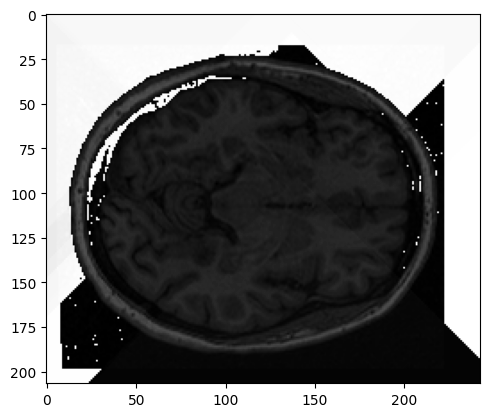

In [15]:
plt.imshow(Rect_Con,cmap='gray')
plt.show()

In [133]:
Rect_Structure_1=cv.getStructuringElement(cv.MORPH_CROSS,ksize=(3,3))
structuring_element = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))
flag=0
CIR_Rect_F = 0
i = 1
Rect_Structure=np.ones([3,3])

while True:

    Rect_Con = (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	Rect_Structure) -
                 cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	Rect_Structure) )
    CIR_Rect = CIR(MRI_Img , Rect_Con,X,Y)
    if CIR_Rect==CIR_Rect_F:
        break;
    
    CIR_Rect_F = CIR_Rect

    kernel_size= 3+2*i
    center = kernel_size // 2
    start_index = center - ((kernel_size-2) // 2 )
    end_index = center + ((kernel_size-2) // 2 + 1)

    Rect_Structure = np.zeros([kernel_size,kernel_size],dtype=np.uint8)

    Rect_Structure[start_index:end_index, start_index:end_index] = Rect_Structure_1
    Rect_Structure = cv.morphologyEx(Rect_Structure, cv.MORPH_DILATE, structuring_element)
    Rect_Structure_1 = Rect_Structure
    i+=1

print(CIR_Rect_F)
print(i)

87.54815769985774
106


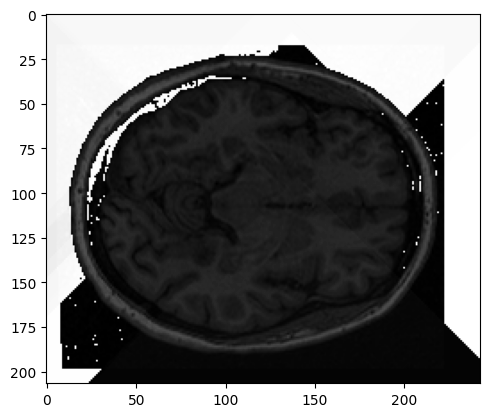

In [120]:
plt.imshow(Rect_Con,cmap='gray')
plt.show()

In [134]:
Rect_Structure_1=cv.getStructuringElement(cv.MORPH_CROSS,ksize=(3,3))
structuring_element = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
flag=0
CIR_Rect_F = 0
i = 1
Rect_Structure=np.ones([3,3])

while True:

    Rect_Con = (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	Rect_Structure) -
                 cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	Rect_Structure) )
    CIR_Rect = CIR(MRI_Img , Rect_Con,X,Y)
    if CIR_Rect==CIR_Rect_F:
        break;
    
    CIR_Rect_F = CIR_Rect

    kernel_size= 3+2*i
    center = kernel_size // 2
    start_index = center - ((kernel_size-2) // 2 )
    end_index = center + ((kernel_size-2) // 2 + 1)

    Rect_Structure = np.zeros([kernel_size,kernel_size],dtype=np.uint8)

    Rect_Structure[start_index:end_index, start_index:end_index] = Rect_Structure_1
    Rect_Structure = cv.morphologyEx(Rect_Structure, cv.MORPH_DILATE, structuring_element)
    Rect_Structure_1 = Rect_Structure
    i+=1

print(CIR_Rect_F)
print(i)

54.887951489564294
50


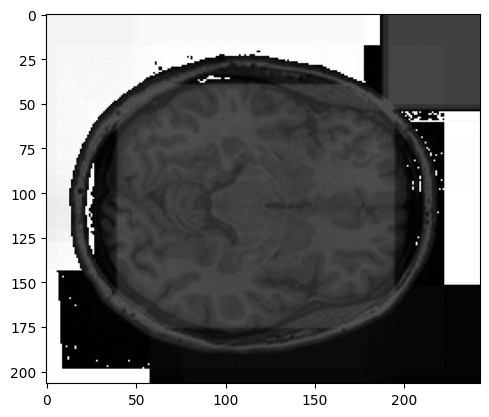

In [135]:
plt.imshow(Rect_Con,cmap='gray')
plt.show()